<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/week9/handwrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

.. 4


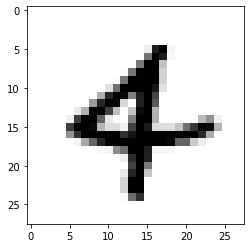

In [22]:
hinh = train_images[150]
import matplotlib.pyplot as plt

plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
print('..',train_labels[150])


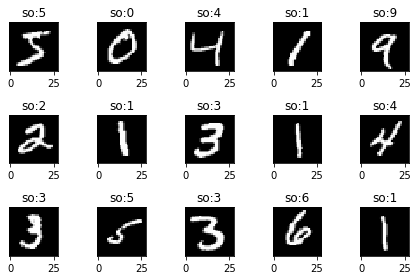

In [23]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks
  plt.yticks([])

In [24]:
from keras import models
from keras.layers import Dense

In [25]:
from keras.models.cloning import Sequential

model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,),name='layout1'))
model.add(Dense(10,activation='softmax',name='layoutN'))  # 10 layout
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
train_images=train_images.reshape((60000,28*28)) # đổi đầu vào thành 1 dãy
train_images=train_images.astype('float32')/255 # đổi kiểu int sang float
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [27]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2635 - accuracy: 0.9236
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1060 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0691 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0501 - accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0377 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0280 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0216 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0161 - accuracy: 0.9958
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0120 - accuracy: 0.9972
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9

In [49]:
model.save('MNIST.h5')

In [50]:
from keras.models import load_model
model11 = load_model('MNIST.h5')
model11.summary()
print(model11.predict([test_images]))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
[[6.0003131e-09 5.0646501e-12 4.1479982e-08 ... 9.9999958e-01
  1.2716523e-09 3.1256612e-08]
 [9.2636177e-11 5.8613995e-07 9.9999934e-01 ... 9.7577613e-17
  3.0855475e-08 1.0539393e-16]
 [1.3813437e-07 9.9946249e-01 3.0981395e-05 ... 9.1967020e-05
  3.9035379e-04 5.5097434e-08]
 ...
 [7.2740715e-17 2.1996905e-14 6.1762714e-18 ... 3.3093738e-07
  1.9770332e-09 7.6445716e-08]
 [3.9835024e

1/1 [==============================] - 0s 44ms/step
Giá trị dự đoán:  7


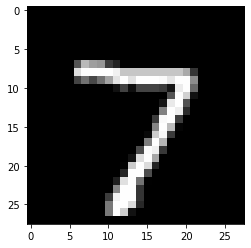

In [51]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')
import numpy as np
y_predict = model11.predict(test_images[0].reshape(1,28*28))
print('Giá trị dự đoán: ', np.argmax(y_predict))

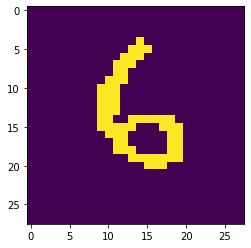

In [52]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

img = load_img(r'6.png', target_size=(28,28))
img = img.convert('L')
plt.imshow(img)

In [53]:
model1 = load_model('MNIST.h5')
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255

np.argmax(model1.predict(img),axis = -1)

#predicted_label = model1.predict(img).argmax()
#print("{}".format(predicted_label))

1/1 [==============================] - 0s 47ms/step


array([6])